## Análisis de regresión lineal múltiple.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import normaltest
import sklearn.metrics as metrics
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from statsmodels.api import OLS
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.feature_selection import SequentialFeatureSelector

plt.style.use('bmh')
plt.rcParams["figure.dpi"] = 96
import warnings
warnings.filterwarnings("ignore")

En primera instancia se cargan los datos, se observan algunas estadísticas de las variables y se buscan valores nulos.

In [2]:
df = pd.read_csv('reg_cancer_deathrate.csv')

In [3]:
df

,DeathRate,Perc_OnlyPrivate,Perc_Private,Perc_Poverty,Perc_MarriedHouse,Avg_Cases,Mean_Male,Mean_Female,BirthRate,Perc_Married,Perc_Unemployed16,Perc_HighSchool25,Perc_HighSchool18_24,Perc_Col18_24,Perc_Bach25,Perc_Emp16,Avg_DeathPerYear,Mean_Income,IncidenceRate
0,140.0,56.7,78.8,10.2,60.824742,17.000000,46.1,49.8,4.047619,66.7,1.2,35.1,38.4,NaN,18.1,64.7,6,45710,405.200000
1,191.5,49.8,64.4,16.9,46.527144,1551.000000,38.1,40.3,5.573941,48.2,11.5,33.3,34.6,38.8,14.0,57.4,658,47708,466.600000
2,203.3,60.4,69.1,9.9,42.882250,8.000000,38.8,32.9,4.391052,40.6,2.1,37.0,52.1,NaN,10.3,80.1,3,68387,201.300000
3,146.2,66.5,84.2,14.2,53.925845,1962.667684,31.4,33.9,6.221294,51.3,3.1,27.2,22.9,NaN,20.1,63.6,20,55292,453.549422
4,192.8,51.4,66.5,13.9,44.244120,187.000000,39.8,41.3,6.150456,47.6,7.0,33.2,26.9,54.7,15.4,59.9,104,46475,354.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,209.5,43.9,64.8,13.4,53.255847,116.000000,49.1,49.4,5.452639,59.3,6.6,38.8,51.1,NaN,14.1,52.9,55,42079,472.200000
3043,187.1,60.0,72.7,11.0,58.086588,209.000000,37.9,39.6,4.025192,55.9,7.3,34.1,49.6,32.1,14.9,59.0,90,62394,421.600000
3044,126.4,NaN,58.2,10.2,58.665503,183.000000,35.8,36.1,4.502177,57.8,6.9,26.1,33.1,NaN,19.6,66.5,58,62529,379.600000
3045,160.1,39.5,54.7,20.6,49.822921,94.000000,38.5,43.6,3.467782,47.5,9.0,39.2,39.4,30.8,8.8,50.6,40,42286,383.000000


In [4]:
df.describe()

,DeathRate,Perc_OnlyPrivate,Perc_Private,Perc_Poverty,Perc_MarriedHouse,Avg_Cases,Mean_Male,Mean_Female,BirthRate,Perc_Married,Perc_Unemployed16,Perc_HighSchool25,Perc_HighSchool18_24,Perc_Col18_24,Perc_Bach25,Perc_Emp16,Avg_DeathPerYear,Mean_Income,IncidenceRate
count,3047.000000,2444.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,762.000000,3047.000000,2895.000000,3047.000000,3047.000000,3047.000000
mean,170.963177,42.453846,64.354939,16.878175,51.243872,606.338544,31.725271,42.145323,5.640306,44.906170,7.852412,34.804660,35.002068,40.977034,13.282015,54.152642,185.965868,46720.668855,448.268586
std,99.068437,79.704247,10.647057,6.409087,6.572814,1416.356223,90.056749,5.292849,1.985816,85.144007,3.452371,7.034924,9.069722,11.115805,5.394756,8.315064,504.134286,12687.958435,54.560733
min,-999.000000,-999.000000,22.300000,3.200000,22.992490,6.000000,-999.000000,22.300000,0.000000,-999.000000,0.400000,7.500000,0.000000,7.100000,2.500000,17.600000,3.000000,-999.000000,201.300000
25%,160.850000,40.900000,57.200000,12.150000,47.763063,76.000000,36.200000,39.100000,4.521419,47.700000,5.500000,30.400000,29.200000,34.000000,9.400000,48.600000,28.000000,38638.500000,420.300000
50%,177.900000,48.600000,65.100000,15.900000,51.669941,171.000000,39.500000,42.400000,5.381478,52.400000,7.600000,35.300000,34.700000,40.400000,12.300000,54.500000,61.000000,45132.000000,453.549422
75%,195.200000,55.600000,72.100000,20.400000,55.395132,518.000000,42.500000,45.300000,6.493677,56.400000,9.700000,39.650000,40.700000,46.400000,16.100000,60.300000,149.000000,52446.000000,480.850000
max,362.800000,78.900000,92.300000,47.400000,78.075397,38150.000000,64.700000,65.700000,21.326165,72.500000,29.400000,54.800000,72.500000,79.000000,42.200000,80.100000,14010.000000,125635.000000,1206.900000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DeathRate             3047 non-null   float64
 1   Perc_OnlyPrivate      2444 non-null   float64
 2   Perc_Private          3047 non-null   float64
 3   Perc_Poverty          3047 non-null   float64
 4   Perc_MarriedHouse     3047 non-null   float64
 5   Avg_Cases             3047 non-null   float64
 6   Mean_Male             3047 non-null   float64
 7   Mean_Female           3047 non-null   float64
 8   BirthRate             3047 non-null   float64
 9   Perc_Married          3047 non-null   float64
 10  Perc_Unemployed16     3047 non-null   float64
 11  Perc_HighSchool25     3047 non-null   float64
 12  Perc_HighSchool18_24  3047 non-null   float64
 13  Perc_Col18_24         762 non-null    float64
 14  Perc_Bach25           3047 non-null   float64
 15  Perc_Emp16           

In [6]:
df.isnull().sum()

DeathRate                  0
Perc_OnlyPrivate         603
Perc_Private               0
Perc_Poverty               0
Perc_MarriedHouse          0
Avg_Cases                  0
Mean_Male                  0
Mean_Female                0
BirthRate                  0
Perc_Married               0
Perc_Unemployed16          0
Perc_HighSchool25          0
Perc_HighSchool18_24       0
Perc_Col18_24           2285
Perc_Bach25                0
Perc_Emp16               152
Avg_DeathPerYear           0
Mean_Income                0
IncidenceRate              0
dtype: int64

In [7]:
Perc_OnlyPrivate = df['Perc_OnlyPrivate'].isna().mean() * 100
Perc_Col18_24 = df['Perc_Col18_24'].isna().mean() * 100
Perc_Emp16 = df['Perc_Emp16'].isna().mean() * 100

print(Perc_OnlyPrivate)
print(Perc_Col18_24)
print(Perc_Emp16)

19.789957335083688
74.9917952084017
4.98851329176239


Se observa que las variables Perc_OnlyPrivate y Perc_Col18_24 tienen una gran cantidad de valores nulos como para aplicar algún tipo de impoutación, por lo que no se considerarán para el análisis.

In [8]:
df.drop(['Perc_OnlyPrivate', 'Perc_Col18_24'], axis = 1, inplace=True)

In [9]:
df['Perc_Emp16'].describe()

count    2895.000000
mean       54.152642
std         8.315064
min        17.600000
25%        48.600000
50%        54.500000
75%        60.300000
max        80.100000
Name: Perc_Emp16, dtype: float64

Para la variable Perc_Emp16, con un 4.98% de valores nulos, se obesrva que la media y la mediana se acercan bastante, por lo que en primera instancia se usará la mediana para reemplazar valores nulos.

In [10]:
Perc_Emp16_median = df['Perc_Emp16'].median()
df['Perc_Emp16'] = df['Perc_Emp16'].fillna(Perc_Emp16_median)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DeathRate             3047 non-null   float64
 1   Perc_Private          3047 non-null   float64
 2   Perc_Poverty          3047 non-null   float64
 3   Perc_MarriedHouse     3047 non-null   float64
 4   Avg_Cases             3047 non-null   float64
 5   Mean_Male             3047 non-null   float64
 6   Mean_Female           3047 non-null   float64
 7   BirthRate             3047 non-null   float64
 8   Perc_Married          3047 non-null   float64
 9   Perc_Unemployed16     3047 non-null   float64
 10  Perc_HighSchool25     3047 non-null   float64
 11  Perc_HighSchool18_24  3047 non-null   float64
 12  Perc_Bach25           3047 non-null   float64
 13  Perc_Emp16            3047 non-null   float64
 14  Avg_DeathPerYear      3047 non-null   int64  
 15  Mean_Income          

Se observan las variables Mean_Male, Perc_Married y Mean_Income con valores negativos. Se realizará conteo y posteriormente se elliminarán, según instrucción inicial.

In [12]:
neg_Mean_Male = [num for num in df.Mean_Male if num < 0]
neg_count = len(neg_Mean_Male)
neg_count

23

In [13]:
neg_count_sort = sorted(neg_Mean_Male)
neg_count_sort

[-999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0,
 -999.0]

In [14]:
neg_Perc_Married = [num for num in df.Perc_Married if num < 0]
neg_count_m = len(neg_Perc_Married)
neg_count_m

20

In [15]:
neg_Mean_Income = [num for num in df.Mean_Income if num < 0]
neg_count_i = len(neg_Mean_Income)
neg_count_i

22

Se identifica que las variables Mean_Male, Perc_Married y Mean_Income tienen 23, 20 y 22 valores negativos respectivamente.

In [16]:
def replace_negatives(val):
    if val < 0:
        return np.nan
    else:
        return val

In [17]:
df_clean = df.applymap(replace_negatives)

In [18]:
df_clean = df_clean.dropna()

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2963 entries, 0 to 3046
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DeathRate             2963 non-null   float64
 1   Perc_Private          2963 non-null   float64
 2   Perc_Poverty          2963 non-null   float64
 3   Perc_MarriedHouse     2963 non-null   float64
 4   Avg_Cases             2963 non-null   float64
 5   Mean_Male             2963 non-null   float64
 6   Mean_Female           2963 non-null   float64
 7   BirthRate             2963 non-null   float64
 8   Perc_Married          2963 non-null   float64
 9   Perc_Unemployed16     2963 non-null   float64
 10  Perc_HighSchool25     2963 non-null   float64
 11  Perc_HighSchool18_24  2963 non-null   float64
 12  Perc_Bach25           2963 non-null   float64
 13  Perc_Emp16            2963 non-null   float64
 14  Avg_DeathPerYear      2963 non-null   int64  
 15  Mean_Income          

In [20]:
df_clean.describe()

,DeathRate,Perc_Private,Perc_Poverty,Perc_MarriedHouse,Avg_Cases,Mean_Male,Mean_Female,BirthRate,Perc_Married,Perc_Unemployed16,Perc_HighSchool25,Perc_HighSchool18_24,Perc_Bach25,Perc_Emp16,Avg_DeathPerYear,Mean_Income,IncidenceRate
count,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000
mean,178.523895,64.399359,16.854944,51.279738,610.526788,39.592103,42.163550,5.648401,51.821026,7.834053,34.815997,34.985859,13.300371,54.198684,187.027675,47107.260884,448.307554
std,27.828877,10.627888,6.414910,6.582961,1431.710626,5.216271,5.291724,1.987059,6.899400,3.436635,7.039095,9.049147,5.407540,8.121483,509.780230,12080.125108,54.644795
min,59.700000,22.300000,3.200000,22.992490,6.000000,22.400000,22.300000,0.000000,23.100000,0.400000,7.500000,0.000000,2.500000,17.600000,3.000000,22640.000000,201.300000
25%,161.100000,57.300000,12.100000,47.801630,76.000000,36.400000,39.100000,4.522753,47.800000,5.500000,30.400000,29.200000,9.400000,48.900000,28.000000,38870.000000,420.650000
50%,177.900000,65.200000,15.800000,51.700680,171.000000,39.600000,42.300000,5.384615,52.500000,7.600000,35.300000,34.700000,12.300000,54.500000,61.000000,45226.000000,453.549422
75%,195.150000,72.100000,20.400000,55.427280,519.500000,42.600000,45.400000,6.493677,56.450000,9.700000,39.700000,40.700000,16.100000,60.000000,148.500000,52539.500000,480.900000
max,362.800000,92.300000,47.400000,78.075397,38150.000000,64.700000,65.700000,21.326165,72.500000,29.400000,54.800000,72.500000,42.200000,80.100000,14010.000000,125635.000000,1206.900000


Se eliminaron valores negativos del set de datos, quedando con 2.963 observaciones.

A continuación, se oberva la distribución de la variable DeathRate incorporando fit=norm, esto proporciona una visualización de cómo la distribución de DeathRate se ajusta a una distribución normal y un gráfico de probabilidad normal para la misma variable.

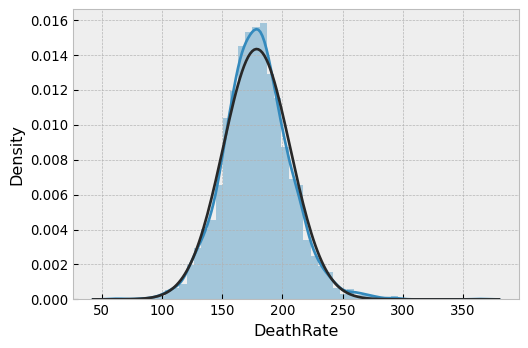

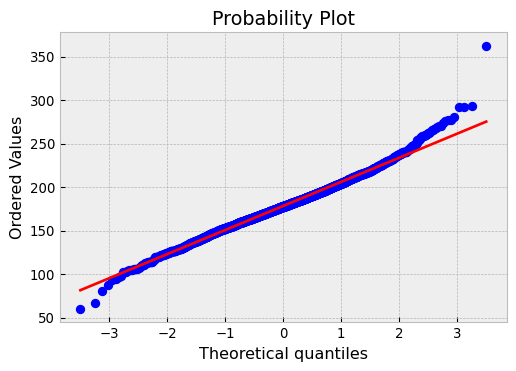

In [21]:
sns.distplot(df_clean['DeathRate'], fit=norm)
fig = plt.figure();
res = stats.probplot(df_clean['DeathRate'], plot=plt)

In [22]:
DeathRate = df_clean['DeathRate']
shapiro_test = stats.shapiro(DeathRate)
shapiro_test

ShapiroResult(statistic=0.9901937246322632, pvalue=2.1084218084551493e-13)

A pesar de que visualmente la variable se asemeja a una distribución normal, mediante test de Shapiro se obtiene el p-value, el cual es inferior a 0.05, por lo que podemos decir que la distribución de la variable no se ajusta a una distribución normal.

Otra forma de ver la distribución de la variable, es mediante boxplot, en donde se observa al igual que en la gráfica anterior, una observación con un valor mucho mayor de 362.8, todas las obesrvaciones que le preceden son inferiores a 300.

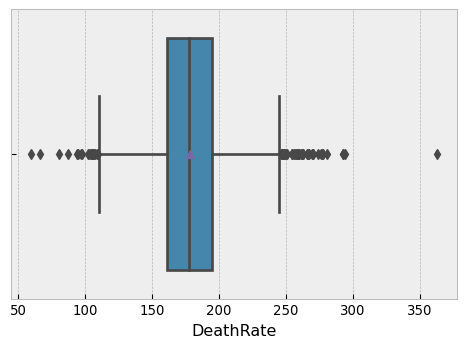

In [23]:
ax = sns.boxplot(x=df_clean['DeathRate'], showmeans=True);

In [24]:
df_clean['DeathRate'].sort_values(ascending=False)

2315    362.8
1019    293.9
108     292.5
347     292.5
768     280.8
        ...  
372      93.8
2513     87.6
2622     80.8
1453     66.3
2185     59.7
Name: DeathRate, Length: 2963, dtype: float64

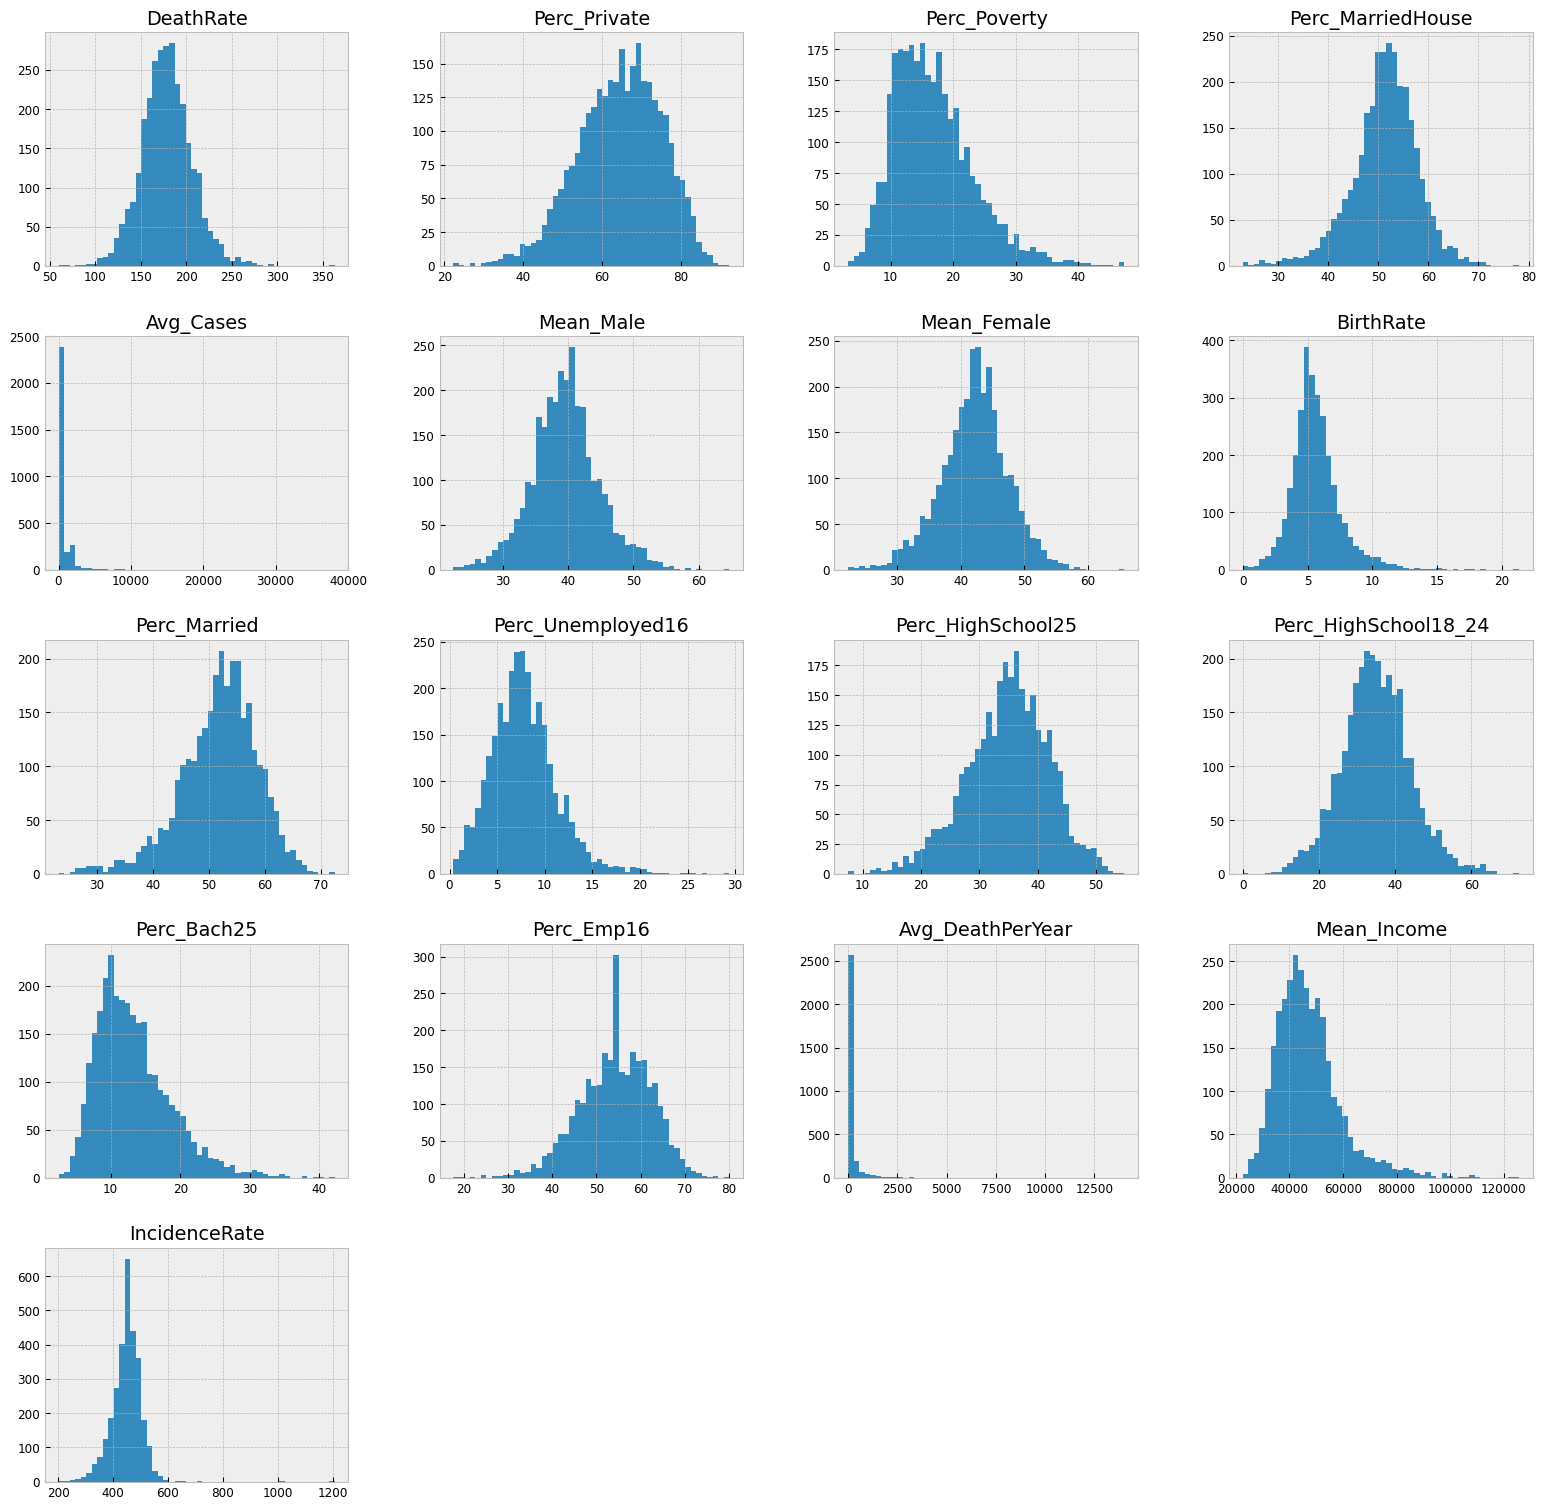

In [25]:
df_hist = df_clean.copy()
df_hist.hist(figsize=(20, 20), bins=50, xlabelsize=9, ylabelsize=9);

Analizando la distribución de las variables, se observa que Avg_Cases y Avg_DeathPerYear tienen una evidente asimetría.

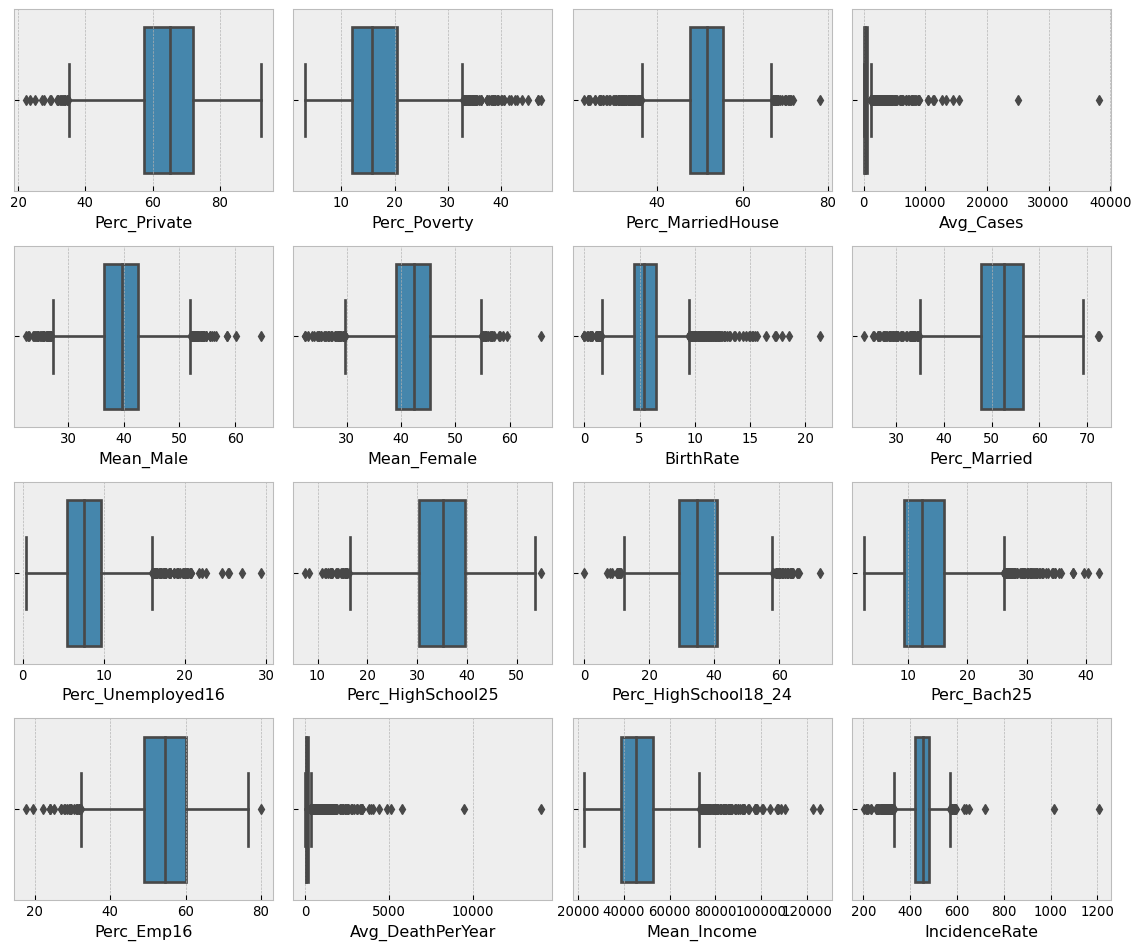

In [26]:
boxplot = df_clean[['Perc_Private', 'Perc_Poverty', 'Perc_MarriedHouse',
                    'Avg_Cases', 'Mean_Male', 'Mean_Female', 'BirthRate', 'Perc_Married',
                    'Perc_Unemployed16', 'Perc_HighSchool25', 'Perc_HighSchool18_24',
                    'Perc_Bach25', 'Perc_Emp16', 'Avg_DeathPerYear', 'Mean_Income',
                    'IncidenceRate']]

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 10))

for i, column in enumerate(boxplot.columns):
    row = i // 4 
    col = i % 4
    sns.boxplot(x=boxplot[column], ax=axes[row][col])

plt.tight_layout()
plt.show();

Si analizamos a través de un gráfico de cajas a las variables predictoras, se observan valores atípicos en Avg_Cases, Avg_DeathPerYear e IncidentRate, lo cual hace que la distribución tenga una cola alargada y se vea asimétrica.

A continuación, a modo de prueba, se aplicará transformación logarítmica para observar como varían las variables anteriormente mencionadas.

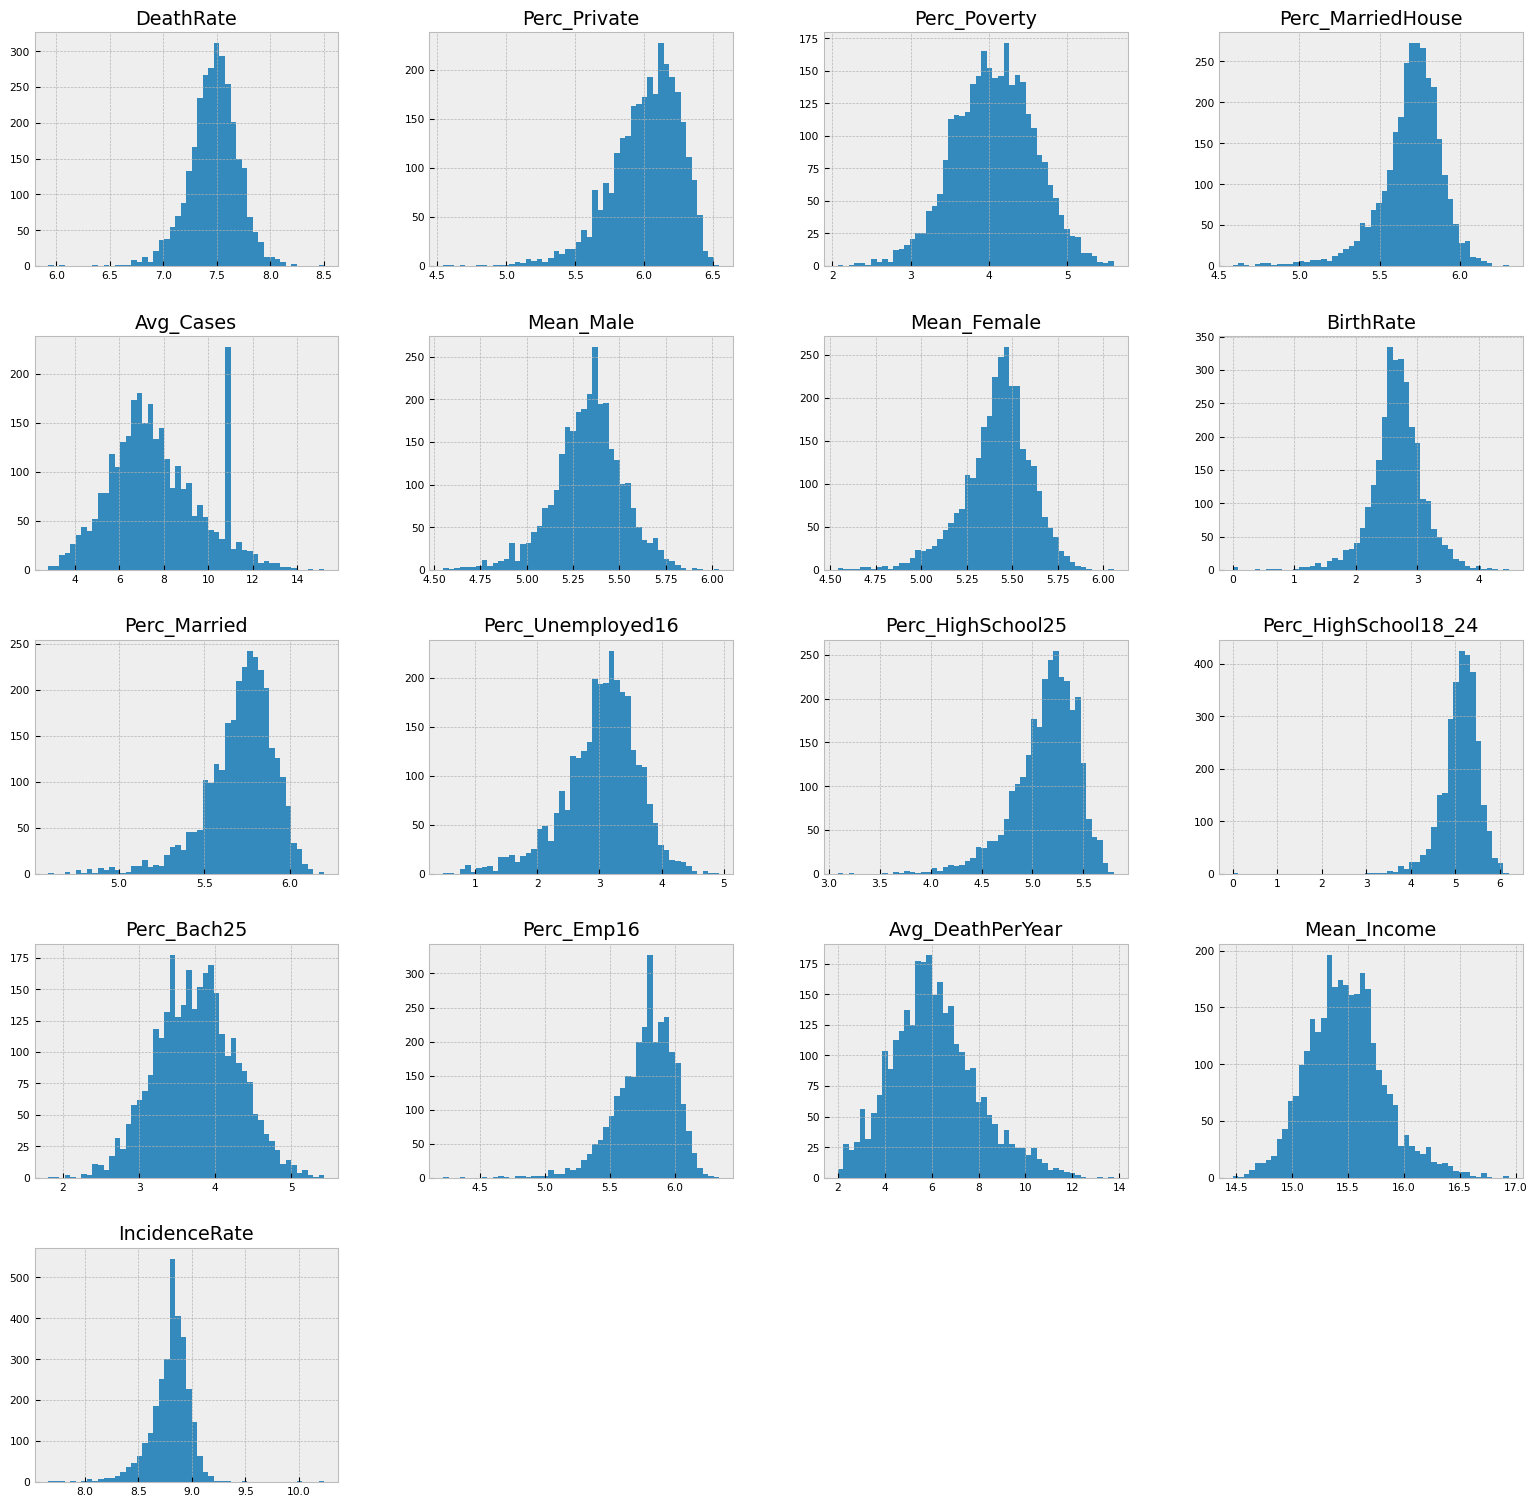

In [27]:
df_hist_log = df_clean.copy()

for column in df_hist_log.columns.tolist():
    df_hist_log[column]=np.log2(df_hist_log[column] + 1)
df_hist_log.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [28]:
df_clean['Avg_Cases'] = np.log2(df_clean['Avg_Cases'] + 1)
df_clean['Avg_DeathPerYear'] = np.log2(df_clean['Avg_DeathPerYear'] + 1)

A continuación, se implementa una visualización para observar la correlación de las variables con la variable objetivo DeathRate.

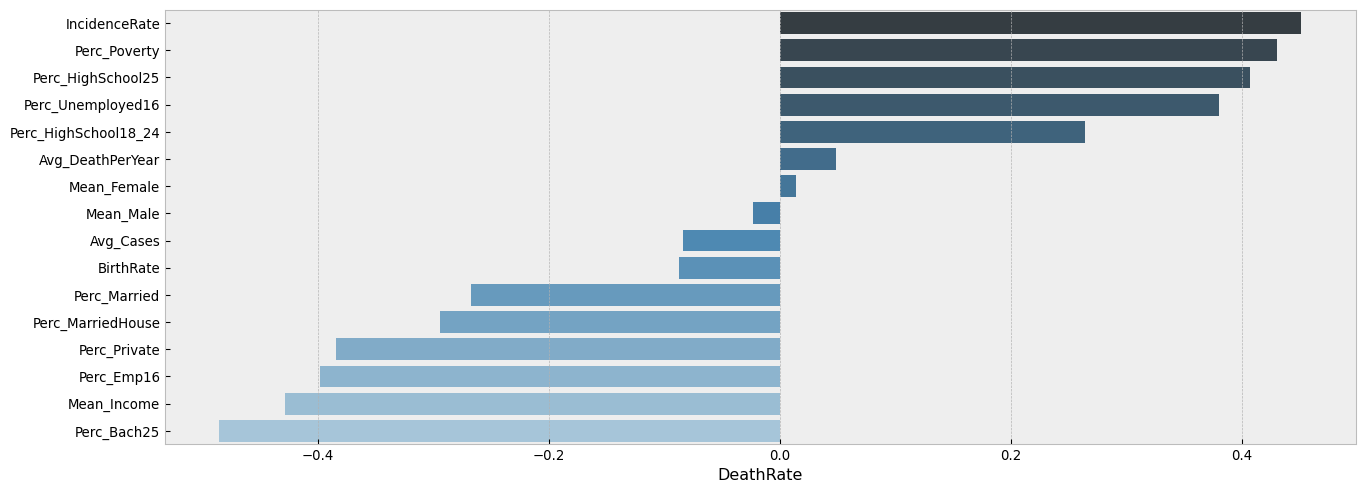

In [29]:
plt.figure(figsize=(16,6))
rank_corr = df_clean.corr()['DeathRate'].drop(['DeathRate'])
rank_corr = rank_corr.sort_values(ascending=False)

pal = sns.color_palette("Blues_d", len(rank_corr))
rank = rank_corr.argsort()

sns.barplot(y=rank_corr.index, x=rank_corr, palette=np.array(pal[::])[rank])

plt.show();

Se observa que el promedio de diagnósticos de cáncer per cápita y el porcentaje de población por debajo de los niveles de pobreza, son las variables que tienen una mayor correlación positiva con la variable promedio de mortalidad per cápita DeathRate. Y el porcentaje de habitantes de la comuna de 25 años o más que han obtenido el título de bachiller y el ingreso promedio por comuna son las variables que tienen una mayor correlación negativa. El promedio de hombres y mujeres de las comunas, son las que menos influyen en la variable objetivo, en cuanto a correlación.

No se utilizarán las variables cercanas a 0 en correlación, ya que en teoría no ayudan a describir la variable objetivo ni positiva ni negativamente debido a su neutralidad.

In [30]:
df_clean.drop(['Mean_Female', 'Mean_Male'], axis = 1, inplace=True)

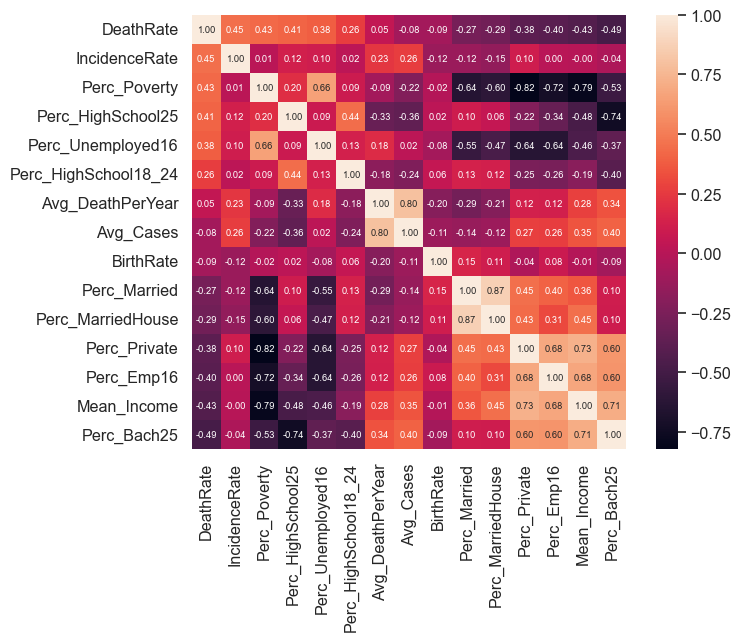

In [31]:
plt.figure(figsize = (8,6))

corrmat = df_clean.corr()
k = 15 
cols = corrmat.nlargest(k, 'DeathRate')['DeathRate'].index
cm = np.corrcoef(df_clean[cols].values.T)
sns.set(font_scale=1.1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols.values, 
                 xticklabels=cols.values)
plt.show();

Mediante el mapa de calor podemos identificar alta correlación entre variables independientes: AvgCases y Avg_DeathPerYear, Prec_MarriedHouse y Prec_Married, etc. Se eliminarán manualmente algunas de estas variables.

In [32]:
df_mlr = df_clean.copy()
df_mlr.drop(['Avg_Cases', 'Perc_MarriedHouse', 'Perc_Private', 'Mean_Income', 'Perc_Poverty', 'Perc_Emp16'], axis = 1, inplace=True)

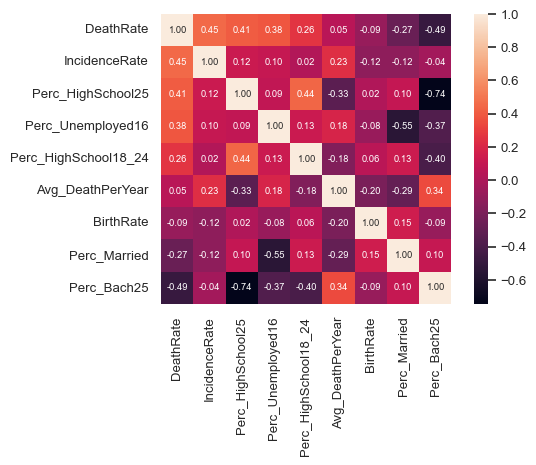

In [33]:
plt.figure(figsize = (6,4))

corrmat = df_mlr.corr()
k = 9 
cols = corrmat.nlargest(k, 'DeathRate')['DeathRate'].index
cm = np.corrcoef(df_mlr[cols].values.T)
sns.set(font_scale=0.9)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols.values, 
                 xticklabels=cols.values)
plt.show();

A continuación, se realizará separación de datos en entrenamiento y prueba.

In [34]:
X = df_mlr.drop('DeathRate', axis=1)
y = df_mlr['DeathRate']

In [35]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

Se imlpementarán 3 modelos de regresión, con scikit-learn, statsmodels y con TensorFlow.

In [37]:
model1 = LinearRegression()

model1.fit(X_train, y_train)

yhat1 = model1.predict(X_test)

In [38]:
X_train_sm = sm.add_constant(X_train, prepend=True)

model2 = sm.OLS(y_train, X_train_sm)

model2 = model2.fit()

In [39]:
X_test_sm = sm.add_constant(X_test)
y_pred_sm = model2.predict(X_test_sm)

In [40]:
model3 = Sequential()
model3.add(Dense(1, input_dim=8))
model3.compile(loss='mse', optimizer='adam')
model3.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
65/65 [==============================] - 0s 1ms/step - loss: 32716.1934
Epoch 2/100
65/65 [==============================] - 0s 900us/step - loss: 32690.4922
Epoch 3/100
65/65 [==============================] - 0s 780us/step - loss: 32664.7402
Epoch 4/100
65/65 [==============================] - 0s 875us/step - loss: 32639.0742
Epoch 5/100
65/65 [==============================] - 0s 1ms/step - loss: 32613.3086
Epoch 6/100
65/65 [==============================] - 0s 1ms/step - loss: 32587.6406
Epoch 7/100
65/65 [==============================] - 0s 1ms/step - loss: 32562.0059
Epoch 8/100
65/65 [==============================] - 0s 1ms/step - loss: 32536.3320
Epoch 9/100
65/65 [==============================] - 0s 1ms/step - loss: 32510.6816
Epoch 10/100
65/65 [==============================] - 0s 1ms/step - loss: 32485.1875
Epoch 11/100
65/65 [==============================] - 0s 1ms/step - loss: 32459.5723
Epoch 12/100
65/65 [==============================] - 0s 1ms/step - 

In [41]:
num_params_sklearn = len(model1.coef_) + 1 
num_params_statsmodels = len(model2.params)
num_params_tensorflow = len(model3.trainable_variables)

y_pred_sklearn = model1.predict(X_test)
mse_sklearn = np.mean((y_test - y_pred_sklearn)**2)

X_test_statsmodels = sm.add_constant(X_test)
y_pred_statsmodels = model2.predict(X_test_statsmodels)
mse_statsmodels = np.mean((y_test - y_pred_statsmodels)**2)

y_pred_tensorflow = model3.predict(X_test)
mse_tensorflow = np.mean((y_test - y_pred_tensorflow.flatten())**2)

aic_sklearn = 2 * num_params_sklearn + len(X_test) * np.log(mse_sklearn)
aic_statsmodels = 2 * num_params_statsmodels + len(X_test) * np.log(mse_statsmodels)
aic_tensorflow = 2 * num_params_tensorflow + len(X_test) * np.log(mse_tensorflow)

print("AIC scikit-learn:", aic_sklearn)
print("AIC statsmodels:", aic_statsmodels)
print("AIC TensorFlow:", aic_tensorflow)

AIC scikit-learn: 5416.555563560589
AIC statsmodels: 5416.555563560591
AIC TensorFlow: 9169.418965230256


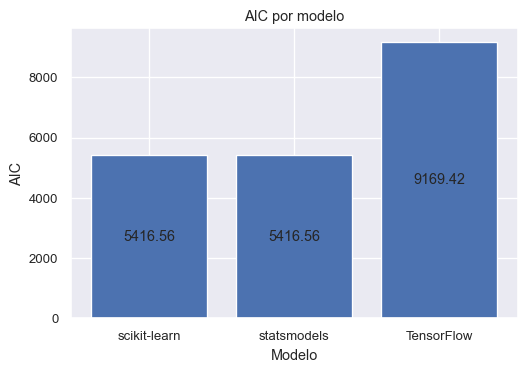

In [42]:
model_names = ['scikit-learn', 'statsmodels', 'TensorFlow']
aic_values = [aic_sklearn, aic_statsmodels, aic_tensorflow]

fig, ax = plt.subplots()

bars = ax.bar(model_names, aic_values)

for i in range(len(model_names)):
    ax.text(bars[i].get_x() + bars[i].get_width() / 2, bars[i].get_height() / 2, f'{aic_values[i]:.2f}', 
            ha='center', va='center')

ax.set_title('AIC por modelo')
ax.set_xlabel('Modelo')
ax.set_ylabel('AIC')

plt.show();

De acuerdo a la métrica de evaluación AIC el modelo realizado con scikit-learn es el que tuvo mejor desempeño

Un método para evaluar multicolinealidad es a través de la técnica de "variance inflation factor" (VIF). El VIF es una medida que cuantifica la magnitud de la multicolinealidad en el modelo, y se calcula para cada variable predictora. Un VIF alto para una variable predictora puede indicar que esa variable está altamente correlacionada con otras variables predictoras en el modelo, lo que puede afectar la interpretación de los coeficientes de regresión.

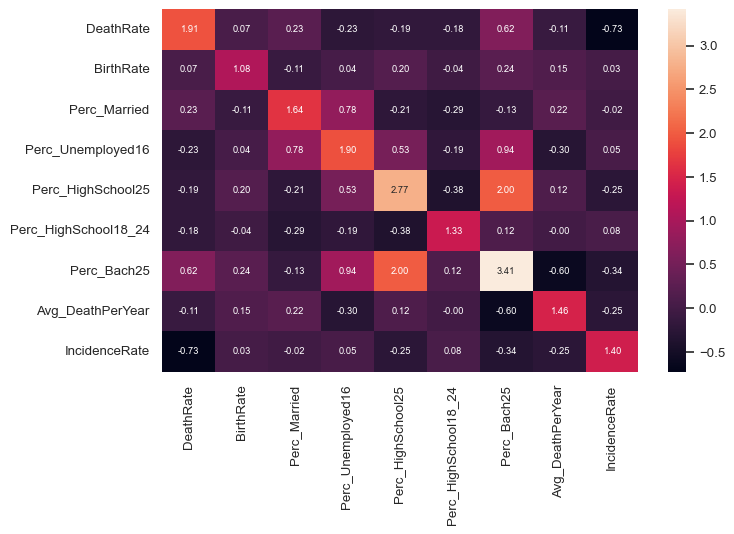

In [43]:
corr = df_mlr.corr()
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

plt.figure(figsize = (8, 5))
sns.heatmap(vif, annot = True , fmt='.2f', annot_kws={'size': 7})
sns.set(font_scale=0.9)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show();

Considerando un VIF de 5 como índice alto, no se encuantran variables que generen multicolinealidad.

In [44]:
df_lr = df.applymap(replace_negatives)
df_lr = df_lr.dropna()
df_lr = df_lr[['DeathRate', 'BirthRate', 'Perc_Married', 'Perc_Unemployed16',
               'Perc_HighSchool25', 'Perc_HighSchool18_24', 'Perc_Bach25',
               'Avg_DeathPerYear', 'IncidenceRate']]

Se realizará selección de variables predictoras mediante SequentialFeatureSelector, indicado que liste las 5 más relevantes. Se utiliza QuantileTransformer como técnica de preprocesamiento, transfomando las variables a una distribución normal. 

In [45]:
X = df_lr.drop('DeathRate', axis=1) 
y = df_lr['DeathRate']

regresion_lineal = LinearRegression()

selector_caracteristicas = SequentialFeatureSelector(regresion_lineal, n_features_to_select=5, direction='forward')

selector_caracteristicas.fit(X, y)

variables_predictoras = X.columns[selector_caracteristicas.get_support()].tolist()
variables_predictoras

['Perc_Married',
 'Perc_Unemployed16',
 'Perc_HighSchool18_24',
 'Perc_Bach25',
 'IncidenceRate']

In [46]:
df_mlr = df_lr[['Perc_Married', 'Perc_Unemployed16', 'Perc_HighSchool18_24', 
               'Perc_Bach25', 'IncidenceRate', 'DeathRate']]

variables_transformar = ['Perc_Married', 'Perc_Unemployed16', 'Perc_HighSchool18_24', 
                         'Perc_Bach25', 'IncidenceRate', 'DeathRate']

for variable in variables_transformar:
    x = df_lr[variable]
    transformer = QuantileTransformer(output_distribution='normal', random_state=24)
    x[x == 0] = 1e-9
    x_transformada = transformer.fit_transform(x.values.reshape(-1, 1))
    df_mlr[variable] = x_transformada.flatten()

Para tratamiento de outliers, se utilizará el método IsolationForest, es un algoritmo de detección de anomalías basado en árboles. En la gráfica de cajas implementada anteriormente fue posible observar dats atípicos, por lo que también se podrían tratar estos datos de forma manual por variable.

In [47]:
clf = IsolationForest(contamination=0.1)

outliers = clf.fit_predict(df_mlr)

df_mlr_sin_outliers = df_mlr[outliers == 1]

In [48]:
X2 = df_mlr_sin_outliers.drop('DeathRate', axis=1)
y2 = df_mlr_sin_outliers['DeathRate']

In [49]:
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

In [50]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=34)

In [51]:
model4 = LinearRegression()

model4.fit(X_train2, y_train2)

yhat2 = model4.predict(X_test2)

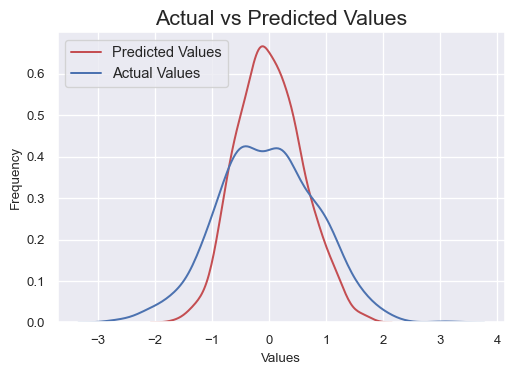

In [53]:
sns.distplot(yhat2, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test2, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.legend(loc = 'upper left', fontsize = 11);

In [54]:
print('R-squared:', metrics.r2_score(y_test2, yhat2))

R-squared: 0.4021676623428092


La metodología empleada de selección de variables, transformación de los datos y eliminación de outliers, no mejoraron el modelo y la curva de valores predichos no se ajusta correctamente a los valores reales de prueba.

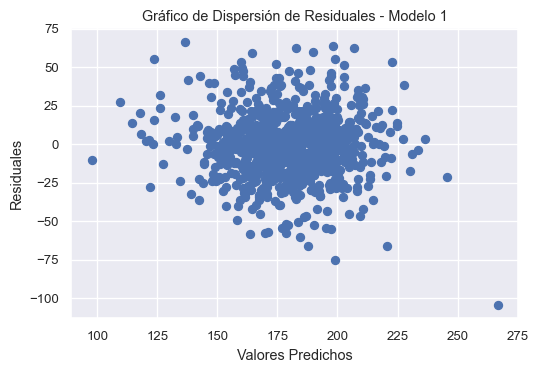

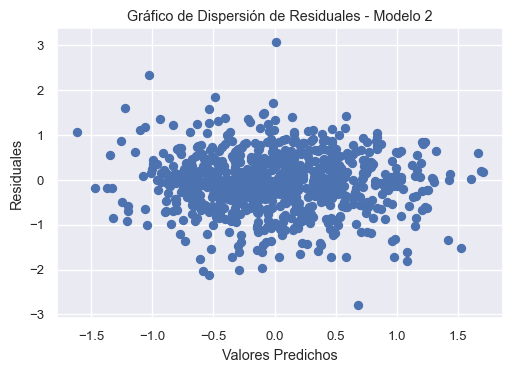

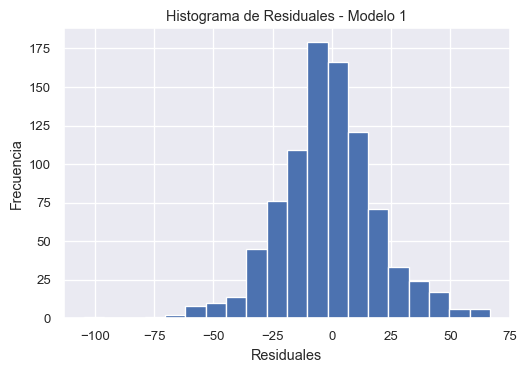

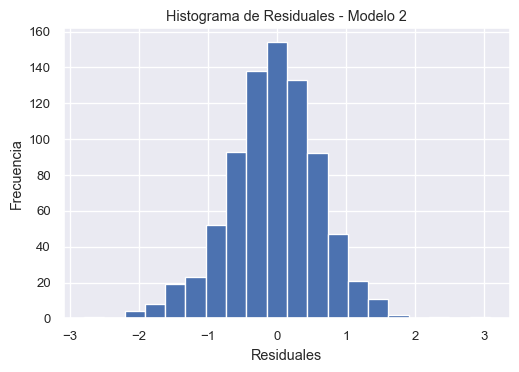

In [55]:
residuales1 = y_test - yhat1
residuales2 = y_test2 - yhat2

plt.scatter(yhat1, residuales1)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.title('Gráfico de Dispersión de Residuales - Modelo 1')
plt.show()

plt.scatter(yhat2, residuales2)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.title('Gráfico de Dispersión de Residuales - Modelo 2')
plt.show()

plt.hist(residuales1, bins=20)
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuales - Modelo 1')
plt.show()

plt.hist(residuales2, bins=20)
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuales - Modelo 2')
plt.show();

In [56]:
stat1, p1 = normaltest(residuales1)
stat2, p2 = normaltest(residuales2)
print('Modelo 1 - Prueba de Normalidad de Residuales: Estadístico = {}, p-valor = {}'.format(stat1, p1))
print('Modelo 2 - Prueba de Normalidad de Residuales: Estadístico = {}, p-valor = {}'.format(stat2, p2))

Modelo 1 - Prueba de Normalidad de Residuales: Estadístico = 27.815271132801914, p-valor = 9.119911358327413e-07
Modelo 2 - Prueba de Normalidad de Residuales: Estadístico = 21.334301497843338, p-valor = 2.3297820351329453e-05


Según la comparación de residuales de ambos modelos, podemos concluir que los residuales de ambos modelos no siguen una distribución normal, siendo el modelo 2 el que tiene el valor más alto.

El resultado obtenido no tuvo un gran desempeño, pero se pudieron implementar distintos tipos de algoritmos de regresión y aplicación de diferentes técnicas para preprocesar, preparar y modelar datos.